<a href="https://colab.research.google.com/github/yuliyaosipava/CLustering_on_Python/blob/main/Article_NacBank_%20Cluster_Factor_region_BEL_118_27_2022_year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Факторный анализ
==================

In [63]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

Будем анализировать экономические показатели по областям и г.Минску. Их 26

In [62]:
from google.colab import files
uploaded = files.upload()

Saving FACtor_2022.xlsx to FACtor_2022 (1).xlsx


pd.read_excel('path_to_file.xls', sheetname='Sheet1')

In [64]:
df = pd.read_excel('FACtor_2022.xlsx')
df

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
0,99.500738,107.0,85.3,107.0,112.4,8.1,6.793348,8.330946,37.7,164.149785,...,14.603817,102.273173,20.297137,92.5,38.251880,19.592250,38.233806,6.875434,4.528955,2.020315
1,100.354444,94.1,92.6,99.7,102.5,12.3,4.645695,5.422105,33.7,109.326005,...,4.850043,103.520867,27.329906,98.8,24.077121,8.894602,11.162982,1.494687,1.793916,0.791123
2,99.973298,62.7,92.8,98.3,98.2,9.2,3.616382,4.234682,30.9,142.051812,...,12.250981,110.740682,13.403756,91.9,27.506630,15.450700,14.183304,2.323610,2.902321,1.064345
3,98.939330,91.3,78.6,97.6,101.6,6.4,4.136628,6.133280,36.3,67.097095,...,5.368532,102.252303,3.838702,84.2,9.348511,8.961008,18.642932,1.332687,1.551263,0.764511
4,98.958732,95.9,102.9,99.9,104.5,12.3,8.421045,9.003137,35.4,152.002488,...,4.422446,100.066247,4.665534,90.3,14.711223,8.464152,26.753456,2.626611,3.503749,1.504217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,96.954207,99.4,60.2,95.2,97.1,1.3,18.107833,22.330074,31.7,116.196799,...,4.599371,100.408893,8.375696,90.2,4.639716,10.247720,41.128863,2.187767,1.197692,1.690390
114,98.645541,113.2,110.2,97.4,99.6,-19.5,7.343052,7.343052,37.3,91.719960,...,3.948567,97.330161,1.275691,86.7,4.606662,11.136985,42.083629,2.152374,1.452263,1.674598
115,97.043847,90.6,91.0,98.4,100.9,5.8,4.956641,5.146249,33.8,49.426934,...,7.961783,99.444444,5.107337,90.2,10.757254,13.446568,41.854801,2.461548,0.784324,1.080385
116,97.335589,46.9,50.1,98.0,100.0,-10.6,3.712654,3.884007,29.9,59.480760,...,4.297310,96.182424,3.079739,81.7,7.766990,9.867898,24.400764,2.104966,0.539790,1.610377


In [65]:
df.fillna(df.mean())

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
0,99.500738,107.0,85.3,107.0,112.4,8.1,6.793348,8.330946,37.7,164.149785,...,14.603817,102.273173,20.297137,92.5,38.251880,19.592250,38.233806,6.875434,4.528955,2.020315
1,100.354444,94.1,92.6,99.7,102.5,12.3,4.645695,5.422105,33.7,109.326005,...,4.850043,103.520867,27.329906,98.8,24.077121,8.894602,11.162982,1.494687,1.793916,0.791123
2,99.973298,62.7,92.8,98.3,98.2,9.2,3.616382,4.234682,30.9,142.051812,...,12.250981,110.740682,13.403756,91.9,27.506630,15.450700,14.183304,2.323610,2.902321,1.064345
3,98.939330,91.3,78.6,97.6,101.6,6.4,4.136628,6.133280,36.3,67.097095,...,5.368532,102.252303,3.838702,84.2,9.348511,8.961008,18.642932,1.332687,1.551263,0.764511
4,98.958732,95.9,102.9,99.9,104.5,12.3,8.421045,9.003137,35.4,152.002488,...,4.422446,100.066247,4.665534,90.3,14.711223,8.464152,26.753456,2.626611,3.503749,1.504217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,96.954207,99.4,60.2,95.2,97.1,1.3,18.107833,22.330074,31.7,116.196799,...,4.599371,100.408893,8.375696,90.2,4.639716,10.247720,41.128863,2.187767,1.197692,1.690390
114,98.645541,113.2,110.2,97.4,99.6,-19.5,7.343052,7.343052,37.3,91.719960,...,3.948567,97.330161,1.275691,86.7,4.606662,11.136985,42.083629,2.152374,1.452263,1.674598
115,97.043847,90.6,91.0,98.4,100.9,5.8,4.956641,5.146249,33.8,49.426934,...,7.961783,99.444444,5.107337,90.2,10.757254,13.446568,41.854801,2.461548,0.784324,1.080385
116,97.335589,46.9,50.1,98.0,100.0,-10.6,3.712654,3.884007,29.9,59.480760,...,4.297310,96.182424,3.079739,81.7,7.766990,9.867898,24.400764,2.104966,0.539790,1.610377


In [66]:
df = df.filter(regex='^(?!.*Unnamed).*$')
df.head()

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
0,99.500738,107.0,85.3,107.0,112.4,8.1,6.793348,8.330946,37.7,164.149785,...,14.603817,102.273173,20.297137,92.5,38.251880,19.592250,38.233806,6.875434,4.528955,2.020315
1,100.354444,94.1,92.6,99.7,102.5,12.3,4.645695,5.422105,33.7,109.326005,...,4.850043,103.520867,27.329906,98.8,24.077121,8.894602,11.162982,1.494687,1.793916,0.791123
2,99.973298,62.7,92.8,98.3,98.2,9.2,3.616382,4.234682,30.9,142.051812,...,12.250981,110.740682,13.403756,91.9,27.506630,15.450700,14.183304,2.323610,2.902321,1.064345
3,98.939330,91.3,78.6,97.6,101.6,6.4,4.136628,6.133280,36.3,67.097095,...,5.368532,102.252303,3.838702,84.2,9.348511,8.961008,18.642932,1.332687,1.551263,0.764511
4,98.958732,95.9,102.9,99.9,104.5,12.3,8.421045,9.003137,35.4,152.002488,...,4.422446,100.066247,4.665534,90.3,14.711223,8.464152,26.753456,2.626611,3.503749,1.504217


In [67]:
df.describe()

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
count,118.000000,118.000000,118.00000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,98.130243,98.951695,89.80678,99.653390,101.633898,7.880508,5.181800,5.811843,35.206780,111.722989,...,6.880021,101.702037,13.218584,91.722034,23.589225,11.819207,25.030674,2.382184,2.036046,1.257127
std,1.471143,20.383267,25.12238,5.722854,5.989196,5.831351,4.570958,4.764610,4.628557,45.967752,...,4.105199,4.257979,13.146979,5.337068,23.003697,4.474060,11.041598,1.497226,1.355434,0.809979
min,94.092742,44.100000,18.00000,88.000000,90.100000,-19.500000,0.724582,0.994021,26.300000,28.966710,...,2.683963,87.369863,1.275691,73.500000,3.714822,6.187644,3.126640,0.306054,0.424190,0.000000
25%,97.194760,86.925000,75.90000,97.400000,98.900000,4.825000,3.367434,3.919347,31.700000,86.020997,...,4.643914,99.578280,4.192851,89.075000,9.944492,9.358792,17.130940,1.385912,1.114183,0.654939
50%,98.236975,97.500000,90.30000,98.650000,101.200000,8.050000,4.459462,5.030723,34.850000,104.479763,...,5.627067,101.246656,10.622040,92.150000,17.379666,10.694059,25.505653,2.106375,1.664917,1.108675
75%,99.058755,112.675000,104.77500,100.675000,103.050000,10.950000,5.841738,6.390093,38.000000,135.288331,...,7.324251,103.113607,16.316620,94.300000,25.790156,12.582195,33.369679,3.006333,2.590053,1.672295
max,101.642022,155.400000,194.30000,139.600000,142.400000,26.100000,47.690750,47.755130,48.900000,275.096154,...,32.464287,124.554901,89.509565,105.300000,151.578013,38.542550,48.549618,8.196688,6.085448,4.585522


In [ ]:
df.corr()

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
"Average employment of the population for the period, %",1.000000,0.033754,-0.073019,-0.004561,-0.022184,0.294580,0.118116,0.103375,-0.064618,0.044882,...,0.200569,0.251095,0.209893,0.416720,0.241529,0.039003,-0.332238,-0.036406,0.120255,-0.117608
Podrjad,0.033754,1.000000,0.247655,0.143725,0.162015,-0.072405,-0.100044,-0.122946,0.159702,-0.062176,...,-0.144534,-0.235251,-0.168588,0.148710,-0.173863,-0.051385,0.190184,0.127740,0.050671,-0.040789
INVEST,-0.073019,0.247655,1.000000,0.060113,0.089572,-0.041130,-0.118087,-0.141944,0.054859,0.003668,...,-0.056283,-0.015878,-0.204336,-0.075043,-0.106108,-0.023177,0.095789,0.049191,0.142948,-0.046409
Real,-0.004561,0.143725,0.060113,1.000000,0.980025,0.184861,-0.072148,-0.080020,0.177215,-0.175291,...,-0.006672,-0.052340,-0.040057,0.183554,-0.037606,0.016799,0.159570,0.395812,0.292505,0.087985
retail,-0.022184,0.162015,0.089572,0.980025,1.000000,0.153853,-0.067393,-0.075009,0.260654,-0.165270,...,-0.100426,-0.148382,-0.114931,0.147784,-0.112296,-0.061279,0.260954,0.461565,0.358170,0.149185
rentab,0.294580,-0.072405,-0.041130,0.184861,0.153853,1.000000,0.011906,0.024477,-0.057242,-0.004434,...,0.147249,0.434024,0.321288,0.260406,0.233631,-0.013691,-0.353541,0.131649,0.310091,-0.121882
Coeff vvoda,0.118116,-0.100044,-0.118087,-0.072148,-0.067393,0.011906,1.000000,0.976936,-0.176755,-0.044166,...,0.091543,0.023555,-0.013827,0.149246,-0.011636,0.082147,0.076977,0.087541,0.082834,0.123433
Coeff obn,0.103375,-0.122946,-0.141944,-0.080020,-0.075009,0.024477,0.976936,1.000000,-0.182606,-0.037763,...,0.096469,0.044417,0.029697,0.127532,0.041773,0.081073,0.054426,0.073758,0.092434,0.125315
Obespech,-0.064618,0.159702,0.054859,0.177215,0.260654,-0.057242,-0.176755,-0.182606,1.000000,0.016072,...,-0.049327,-0.305564,-0.237601,0.006834,-0.154939,0.088049,0.531433,0.425138,0.310616,0.303555
Vvod,0.044882,-0.062176,0.003668,-0.175291,-0.165270,-0.004434,-0.044166,-0.037763,0.016072,1.000000,...,-0.028013,0.027024,0.013875,0.033020,0.072290,-0.050569,-0.025644,-0.072938,-0.085427,0.062230


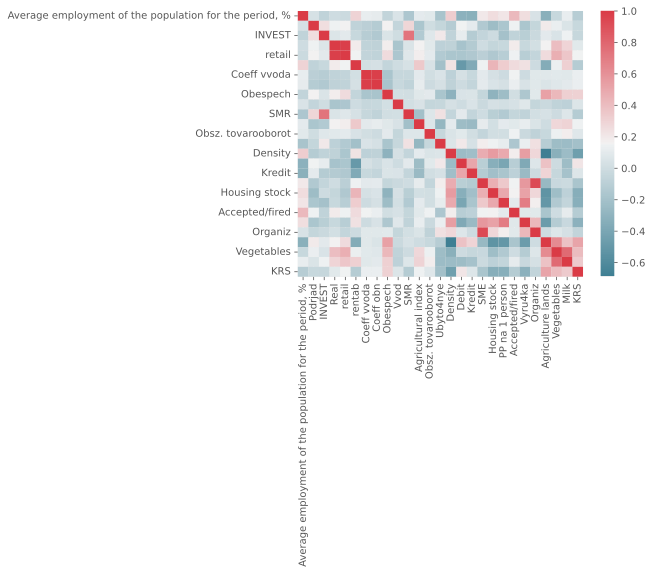

In [68]:
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.heatmap(df.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True));

Видим, что данные фичи далеки от нормальных, корреляции между фичами не наблюдается.

Метод главных компонент
=============

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


Cтандартизируем переменные. Из предварительного анализа видно, что это важно.

In [83]:
import math
from sklearn import preprocessing
#  from sklearn.decomposition import PCA


# Функция для стандартизации фич
def scale_features(df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    return scaled


проба
df1=df.iloc[:,1:29]
df1

надо обязательно

In [84]:
df_scaled = preprocessing.scale(df)

Наконец, сами факторы (как новые векторы-фичи) можно получить, применив метод transform.

In [85]:
df_scaled

array([[ 0.93555743,  0.39653243, -0.18015803, ...,  3.01384693,
         1.84703826,  0.94625018],
       [ 1.51833349, -0.23903845,  0.11165868, ..., -0.59528872,
        -0.17939837, -0.57778281],
       [ 1.25814689, -1.78608697,  0.11965366, ..., -0.0392888 ,
         0.64183766, -0.23902378],
       ...,
       [-0.74161924, -0.41148017,  0.04769885, ...,  0.05323281,
        -0.92742219, -0.21913699],
       [-0.5424641 , -2.56453814, -1.58727421, ..., -0.18594439,
        -1.10860176,  0.43798239],
       [-0.21264304,  0.83995398, -0.30807768, ...,  1.13052613,
         2.07906964, -1.12816629]])

ПРобуем другой код

In [74]:
## How we can reduce dimentionality using PCA in Python
def ProjectPro_Ex_179():
    print()
    print('**How we can reduce dimentionality using PCA in Python**')

    # loading libraries
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn import datasets

    # Loading Digits Data And Make Sparse


    # Standardizing the feature matrix
    X = StandardScaler().fit_transform(df)
    print(); print('стандартизированная выборка\n', X)

    # Conducting Principal Component Analysis
    # Create a PCA that will retain 85% of the variance
    pca = PCA(n_components=0.71, whiten=True)

    # Conducting PCA
    X_pca = pca.fit_transform(X)
    print(); print(' после PCA\n', X_pca)

    # Show results
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_pca.shape[1])

    # Creating a PCA with 9 components
    pca = PCA(n_components= 9, whiten=True)

    # Conducting PCA
    X_pca = pca.fit_transform(X)
    print(); print(X_pca)

    # Show results
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_pca.shape[1])

ProjectPro_Ex_179()


**How we can reduce dimentionality using PCA in Python**

стандартизированная выборка
 [[ 0.93555743  0.39653243 -0.18015803 ...  3.01384693  1.84703826
   0.94625018]
 [ 1.51833349 -0.23903845  0.11165868 ... -0.59528872 -0.17939837
  -0.57778281]
 [ 1.25814689 -1.78608697  0.11965366 ... -0.0392888   0.64183766
  -0.23902378]
 ...
 [-0.74161924 -0.41148017  0.04769885 ...  0.05323281 -0.92742219
  -0.21913699]
 [-0.5424641  -2.56453814 -1.58727421 ... -0.18594439 -1.10860176
   0.43798239]
 [-0.21264304  0.83995398 -0.30807768 ...  1.13052613  2.07906964
  -1.12816629]]

 после PCA
 [[-0.22030557  2.15747168  0.35038816 ... -0.17683481 -0.96370875
   0.72117491]
 [ 0.98938915  0.53392875 -0.39598021 ... -0.40924277 -0.15128151
   0.0583295 ]
 [ 1.15357353  0.21191942  0.08825538 ... -0.12319893  0.37252754
   0.40269042]
 ...
 [-0.75651218 -0.66931258  0.48913335 ... -0.02219491  0.23283143
  -0.96387564]
 [-0.61104367 -1.52495071  1.00942709 ...  2.03901306  1.68117899
  -0.5292522

Попробовали

In [77]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
pca.fit(df_scaled)
X_norm=df_scaled-df_scaled.mean(axis=0)
C=np.dot(X_norm.T, X_norm) # ковариационная матрица
print(np.linalg.eig(C)) #кортеж из собственных значений и матрицы из собственных векторов-столбцов
print("pca\n", pca.components_) # собственные вектора (столбцы)
print('explained', pca.explained_variance_ratio_)

EigResult(eigenvalues=array([616.55555014, 425.71862188, 284.302339  , 255.12321785,
       215.98098282, 168.30792494, 163.93855445, 126.41369773,
       111.62418262, 105.65274381,  94.99402616,  86.89078845,
         0.87630154,   3.03131011,   2.19584517,  12.23268622,
        17.77686723,  21.67178589,  27.89127561,  73.21423338,
        69.43858796,  38.09048111,  41.96482228,  48.32044636,
        62.78458476,  53.31198669,  57.69615583]), eigenvectors=array([[ 1.80636828e-01, -1.77789303e-01, -4.70353721e-02,
        -1.24736354e-01,  1.40627106e-01, -5.93351823e-02,
         4.07687427e-01,  1.26844822e-01,  1.51446194e-01,
        -1.28522059e-01,  3.85845780e-01, -3.23363220e-02,
         2.09250659e-03, -5.76372812e-02, -2.31341129e-02,
        -2.60670030e-02, -4.73336946e-02,  1.39669212e-01,
         2.89323530e-02,  2.67076641e-01, -8.83982780e-02,
        -1.70527831e-01, -6.01466620e-02, -5.06211438e-01,
         2.06775615e-01, -2.86832986e-01,  5.26403183e-02],
    

Попробуем с помощью метода главных компонент спроецировать
данные на n-мерную плоскость.
То есть выделим 2-3-4-5 главных компоненты.
Реализация метода содержится в классе ```PCA```
библиотеки ```sklearn.decomposition```.



In [86]:
from sklearn.decomposition import PCA

In [87]:
pca = PCA(n_components=9)
pca.fit(df)
print(pca.explained_variance_ratio_)


[0.29683936 0.26075131 0.13050948 0.10104368 0.05036731 0.03334858
 0.03250506 0.02794709 0.013124  ]


In [88]:
print('original', df_scaled.shape[1])
print('reduced', pca.components_.shape[1])

original 27
reduced 27


**Кластерный** **анализ**

array([0.19352026, 0.13362166, 0.08923488, 0.08007634, 0.06779064,
       0.05282735, 0.05145592, 0.03967787, 0.03503584])

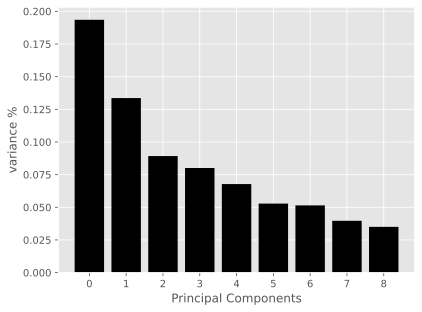

In [89]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Create a PCA instance
pca=PCA(n_components=9)
principalComponents=pca.fit_transform(df_scaled)
#Plot the expained variaces
features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_,color='black')
plt.xlabel("Principal Components")
plt.ylabel('variance %')
plt.xticks(features)

#Save components to a dataframe
PCA_components=pd.DataFrame(principalComponents)

#Show the expained variance by each principal component
pca.explained_variance_ratio_

In [ ]:
weights=pca.components_
weights

array([[ 1.80636828e-01, -1.23605049e-01, -7.82459628e-02,
        -8.60905332e-02, -1.36220624e-01,  1.74755992e-01,
         1.62519142e-02,  2.92376836e-02, -2.03282736e-01,
         2.21206840e-02, -5.94802554e-02,  3.87311419e-02,
        -2.41191776e-02,  7.12599424e-02,  3.43517932e-01,
        -1.98733783e-01, -1.48790008e-01,  2.55194146e-01,
         3.26772416e-01,  3.09465416e-01,  9.69601109e-02,
         3.23794717e-01,  1.49638737e-01, -3.65690136e-01,
        -2.08308830e-01, -1.24310003e-01, -2.43537286e-01],
       [ 1.77789303e-01,  1.11670234e-02, -2.30959983e-02,
         3.34703456e-01,  3.46265118e-01,  2.95355618e-01,
         6.09837328e-02,  6.74352053e-02,  1.68262928e-01,
        -5.80538832e-02, -5.10785635e-02,  2.80590595e-01,
         9.48800050e-02, -2.05678425e-01,  1.12981298e-03,
        -2.63726425e-01, -2.32365623e-01,  8.26756212e-02,
         5.65155421e-02,  7.56049882e-02,  1.77078739e-01,
         9.15624210e-02,  5.50104600e-02,  7.44158526e-

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

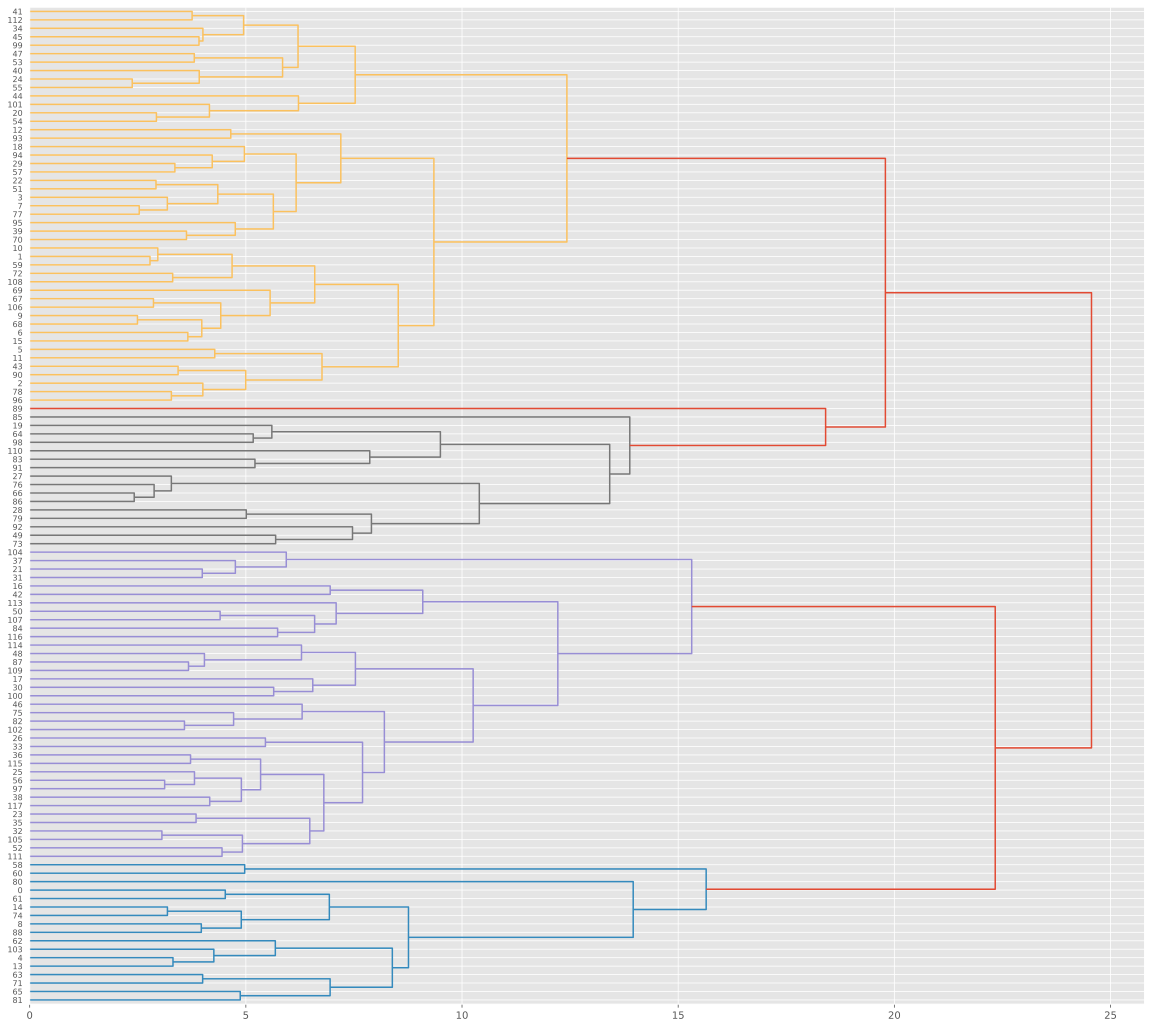

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
Z1 = linkage(df_scaled, method='ward', metric='euclidean')
labelList = list(range(len(df_scaled)))
plt.figure(figsize=(20, 18))
dendrogram(
    Z1,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=8
)
plt.show()

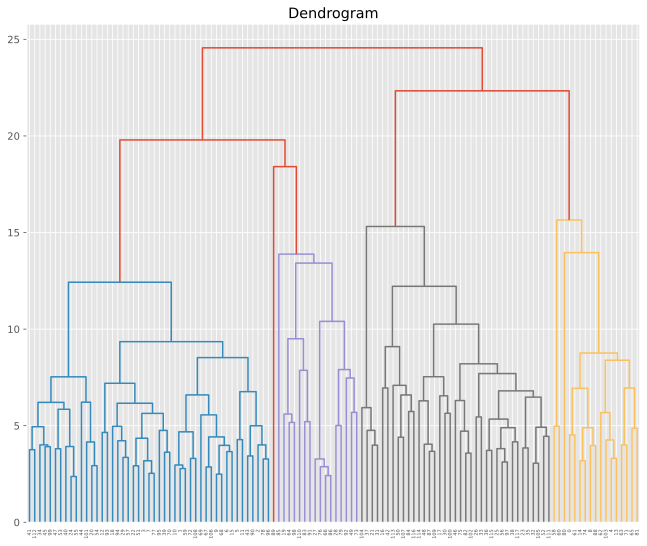

In [93]:
#Create a dendrogram using hierarchical clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(11, 9))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))

In [94]:
from sklearn.cluster import AgglomerativeClustering

# Предполагая, что вы уже обучили модель AgglomerativeClustering
agg_model = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(df_scaled)


df['cluster_nbr'] = agg_model.labels_
print(df['cluster_nbr'] )


0      1
1      3
2      3
3      3
4      1
      ..
113    2
114    2
115    2
116    2
117    2
Name: cluster_nbr, Length: 118, dtype: int64


df['Cluster1'] = agg_model.labels_
df['Cluster1']

In [95]:
cluster_counts = df.groupby('cluster_nbr').count()
cluster_counts

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
cluster_nbr,,,,,,,,,,,,,,,,,,,,,
0,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
1,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
2,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
3,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47


In [ ]:
# Сохранение DataFrame в CSV
df['cluster_nbr'].to_excel('cluster_number_claster2022_26.xlsx', index=False)

# Скачивание файла
files.download('cluster_number_claster2022_26.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
cluster_means = df.groupby('cluster_nbr').mean()
cluster_means

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
cluster_nbr,,,,,,,,,,,,,,,,,,,,,
0,98.861184,92.664706,81.435294,98.117647,98.835294,9.841176,7.796379,8.929337,32.164706,110.784607,...,13.106405,105.858406,29.431021,92.923529,59.173703,17.366144,14.288643,1.467521,1.298054,0.681841
1,98.599056,104.323529,98.658824,104.429412,107.688235,11.970588,5.890609,6.481199,39.447059,116.550473,...,6.579620,100.271658,13.318298,93.323529,25.239605,11.509582,31.978285,4.879241,4.517573,1.753161
2,97.116979,101.240541,88.681081,99.040541,101.259459,2.862162,4.984526,5.450225,36.264865,110.700739,...,5.278376,99.313644,6.340501,89.967568,10.365743,11.589448,33.802759,2.486539,1.536417,1.639038
3,98.493965,97.480851,90.519149,98.963830,100.751064,9.642553,4.135024,4.726808,33.940426,111.121043,...,5.997449,102.596263,12.733104,92.089362,20.531272,10.105734,19.497439,1.727678,1.798731,0.985140


In [ ]:
# Сохранение DataFrame в CSV
#cluster_means.to_excel('cluster_means_claster2022_26.xlsx', index=False)

# Скачивание файла
#files.download('cluster_means_claster2022_26.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
from sklearn.cluster import KMeans

# Assuming you have already fit the KMeans model
# Предполагая, что вы уже обучили модель KMeans
kmeans_model = KMeans(n_clusters=4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42).fit(df_scaled)

# Получите метки кластеров для каждой точки
df['cluster_nbr1'] = kmeans_model.labels_


print(df['cluster_nbr1'] )


0      0
1      3
2      3
3      3
4      0
      ..
113    1
114    1
115    1
116    1
117    1
Name: cluster_nbr1, Length: 118, dtype: int32


In [104]:
kmeans_model.cluster_centers_

array([[ 3.19756936e-01,  4.21782829e-01,  4.04224918e-01,
         9.18498123e-01,  1.13453550e+00,  5.66294791e-01,
         1.82457950e-01,  1.66149906e-01,  9.61339440e-01,
         1.19752920e-01,  3.29805177e-01,  7.17313926e-01,
         7.66645302e-01, -6.52969237e-01, -3.46582966e-01,
        -4.08994856e-01, -5.60745207e-01, -2.42430679e-01,
        -4.92807335e-01, -1.69407466e-01,  2.89866127e-01,
        -2.93699107e-02, -1.55457576e-01,  8.04113346e-01,
         1.61109938e+00,  1.80700983e+00,  7.61300018e-01],
       [-7.31475844e-01, -1.70578085e-03, -1.24973178e-01,
        -1.36059287e-01, -1.07927549e-01, -7.57343266e-01,
         5.80998356e-02,  5.25611062e-02,  1.87982053e-01,
        -6.17191351e-02, -1.88000730e-01, -2.33910562e-01,
        -1.91132938e-01,  1.28479322e-01, -5.62021859e-01,
         7.34623383e-01,  6.18429599e-01, -2.39421837e-01,
        -5.45830850e-01, -5.40282535e-01, -4.32342567e-01,
        -4.94721292e-01,  7.81259342e-02,  7.89620511e-

In [105]:
cluster_means = df.groupby('cluster_nbr1').mean()
cluster_means

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS,cluster_nbr
cluster_nbr1,,,,,,,,,,,,,,,,,,,,,
0,98.598654,107.512500,99.918750,104.887500,108.400000,11.168750,6.012266,6.600121,39.637500,117.204387,...,99.612584,11.000845,93.262500,22.916477,11.126634,33.871669,4.784122,4.474929,1.871146,1.125000
1,97.058706,98.917073,86.680488,98.878049,100.990244,3.482927,5.446244,6.061212,36.073171,108.897946,...,99.387769,6.145662,89.424390,12.257131,12.167263,33.712324,2.558085,1.796937,1.699519,2.048780
2,98.880631,92.333333,79.458333,98.808333,99.150000,11.675000,8.739870,10.096813,32.675000,117.188165,...,108.537936,37.685840,92.891667,73.952395,19.102752,13.707154,1.865245,1.675091,0.682892,0.083333
3,98.690115,97.806122,91.655102,98.800000,100.571429,9.557143,3.817993,4.296409,33.655102,110.958546,...,102.646636,13.868921,92.855102,20.957016,9.970398,17.652687,1.577293,1.528145,0.827096,2.632653


In [ ]:
# Сохранение DataFrame в CSV
cluster_means.to_excel('MEANS_.xlsx', index=False)

# Скачивание файла
files.download('MEANS_.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
df.groupby('cluster_nbr1').size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7cca43ba7be0>>

In [106]:
cluster_counts = df.groupby('cluster_nbr1').count()
cluster_counts

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS,cluster_nbr
cluster_nbr1,,,,,,,,,,,,,,,,,,,,,
0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
1,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
2,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
3,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49


In [102]:
#  Выведем состав каждого кластера
df['cluster_nbr1'].sort_values()

0      0
103    0
81     0
80     0
74     0
      ..
9      3
59     3
56     3
68     3
6      3
Name: cluster_nbr1, Length: 118, dtype: int32

In [ ]:
#view updated DataFrame
print(df.iloc[:,0],df.iloc[:,28])

0       99.500738
1      100.354444
2       99.973298
3       98.939330
4       98.958732
          ...    
113     96.954207
114     98.645541
115     97.043847
116     97.335589
117     97.818743
Name: Average employment of the population for the period, %, Length: 118, dtype: float64 0      0
1      3
2      3
3      3
4      0
      ..
113    1
114    1
115    1
116    1
117    1
Name: cluster_nbr1, Length: 118, dtype: int32


In [ ]:
# Сохранение DataFrame в CSV
df.to_excel('KMEANS_18-05-2024.xlsx', index=False)

# Скачивание файла
files.download('KMEANS_18-05-2024.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Самый главный вопрос, который нам предстоит решить на этапе обучения модели заключается в выборе количества кластеров.

Количество кластеров в методе k-средних являтся так называемым гиперпараметром, то есть параметром, который нужно задать до обучения модели.

Мы усложним решаемую нами задачу и сделаем вид, что не обладаем экспертными знаниями о количестве кластеров. Значит нужно использовать метод локтя.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

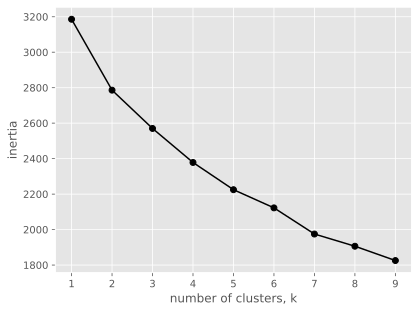

In [107]:
#Elbow method
ks=range(1,10)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(df_scaled) #we only use the first 3 principal components
    inertias.append(model.inertia_)

plt.plot(ks,inertias, '-o',color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show

Text(0, 0.5, 'WCSS')

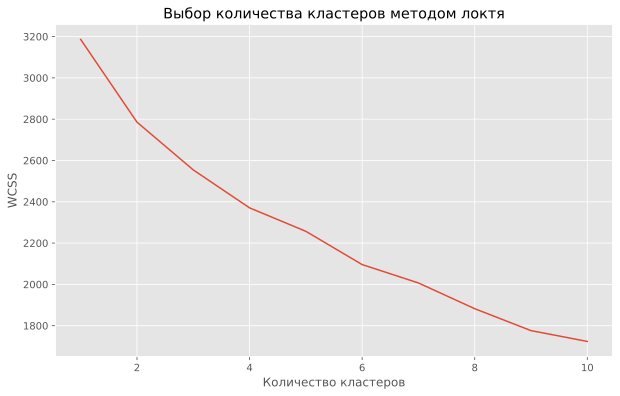

In [108]:
# импортируем нужный класс
from sklearn.cluster import KMeans

# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []

# воспользуемся новой для нас функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
for i in range(1, 11):

    # настроим параметры модели (подробнее об этом расскажу чуть дальше)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(df_scaled)

    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)

# зададим размер график
plt.figure(figsize = (10,6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 11), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

In [ ]:
# Сохранение DataFrame в CSV
cluster_means1.to_excel('cluster_means_claster2022_26.xlsx', index=False)

# Скачивание файла
files.download('cluster_means_claster2022_26.xlsx')


cluster_means = df_scaled.groupby('cluster_nbr').mean()
cluster_means

In [112]:
cluster_count = df['kmeans_model'].groupby.count()
cluster_count


KeyError: 'kmeans_model'

In [ ]:
from google.colab import files

# Сохранение DataFrame в CSV
df.to_excel('df_claster2022_label.xlsx', index=False)

# Скачивание файла
files.download('df_claster2022_label.xlsx')

In [ ]:
from google.colab import files

# Сохранение DataFrame в CSV
df_clusters.to_excel('df_claster2022_mean.xlsx', index=False)

# Скачивание файла
files.download('df_claster2022_mean.xlsx')

In [118]:
#Add cluster labels to the original dataset and export to csv file
df_clusters=pd.concat([df.reset_index(drop=True),pd.DataFrame(df_scaled)],axis=1)


from google.colab import files

# Сохранение DataFrame в CSV
df_clusters.to_excel('df_claster2022_last.xlsx', index=False)

# Скачивание файла
files.download('df_claster2022_last.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

import pandas as pd

# Создаем DataFrame с информацией о кластерах
clusters_df = pd.DataFrame({
    'Cluster': labelList,  # Номер кластера
    'Linkage': Z1[:, 2]  # Значение связи для каждого кластера
})

# Добавьте другие интересующие вас характеристики кластеров (например, средние значения признаков)

# Сохраняем результаты в Excel
clusters_df.to_excel('clusters_results.xlsx', index=False)


#Add cluster labels to the original dataset and export to csv file
df['cluster_nbr']=labelList
df_clusters=pd.concat([df.reset_index(drop=True), pd.DataFrame(Z1[:, 2])],axis=1)

In [119]:
#Add cluster labels to the original dataset and export to csv file
df['cluster_nbr']=labels
df_clusters=pd.concat([df.reset_index(drop=True),pd.DataFrame(df_scaled)],axis=1)


In [ ]:
df['cluster_nbr']

In [ ]:
from google.colab import files

# Сохранение DataFrame в CSV
df_clusters.to_excel('df_claster2022.xlsx', index=False)

# Скачивание файла
files.download('df_claster2022.xlsx')

In [120]:
Z2 = linkage(PCA_components, method='ward', metric='euclidean')

In [122]:
labelList = list(range(len(PCA_components)))

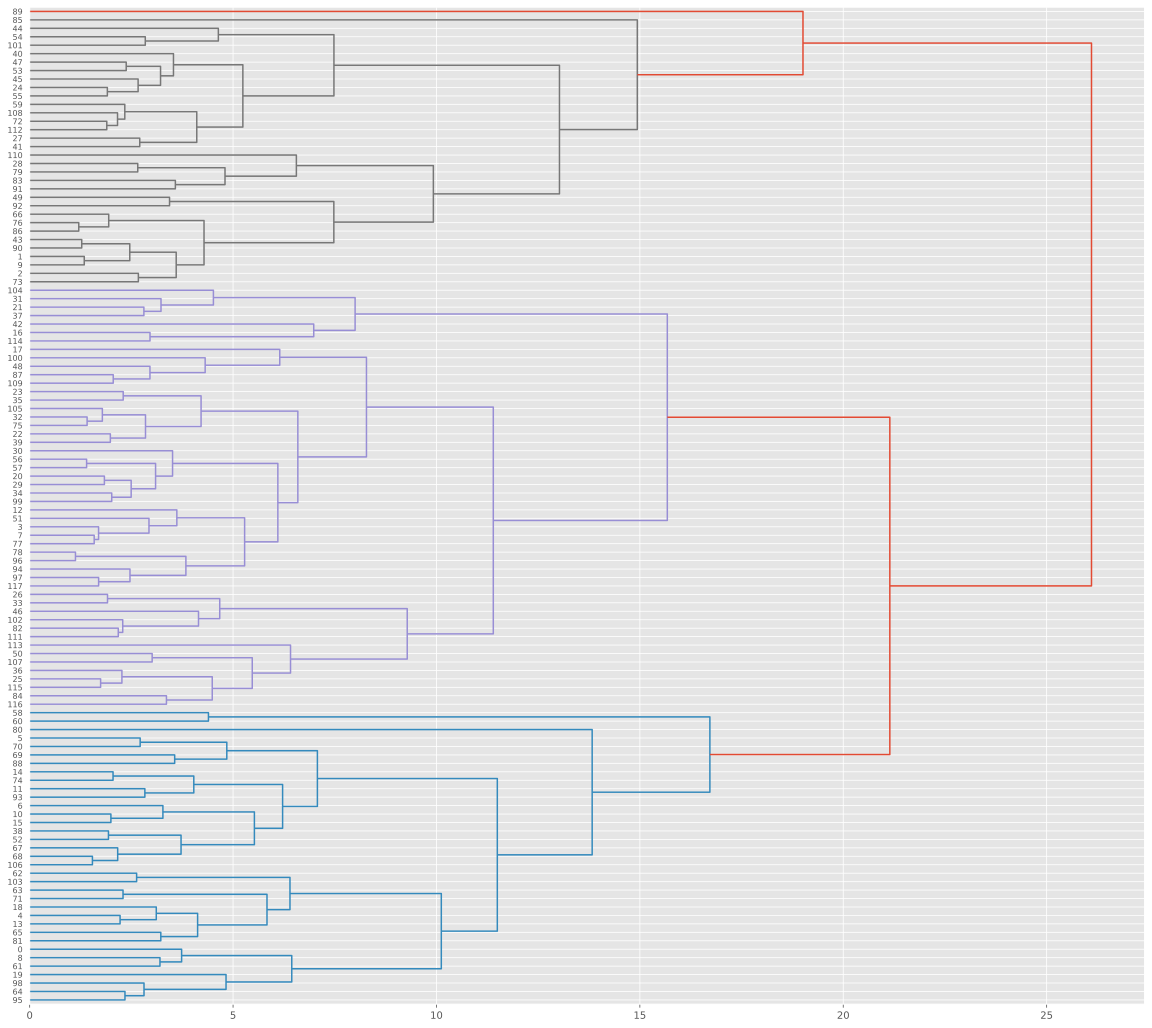

In [124]:
plt.figure(figsize=(20, 18))
dendrogram(
    Z2,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=8
)
plt.show()

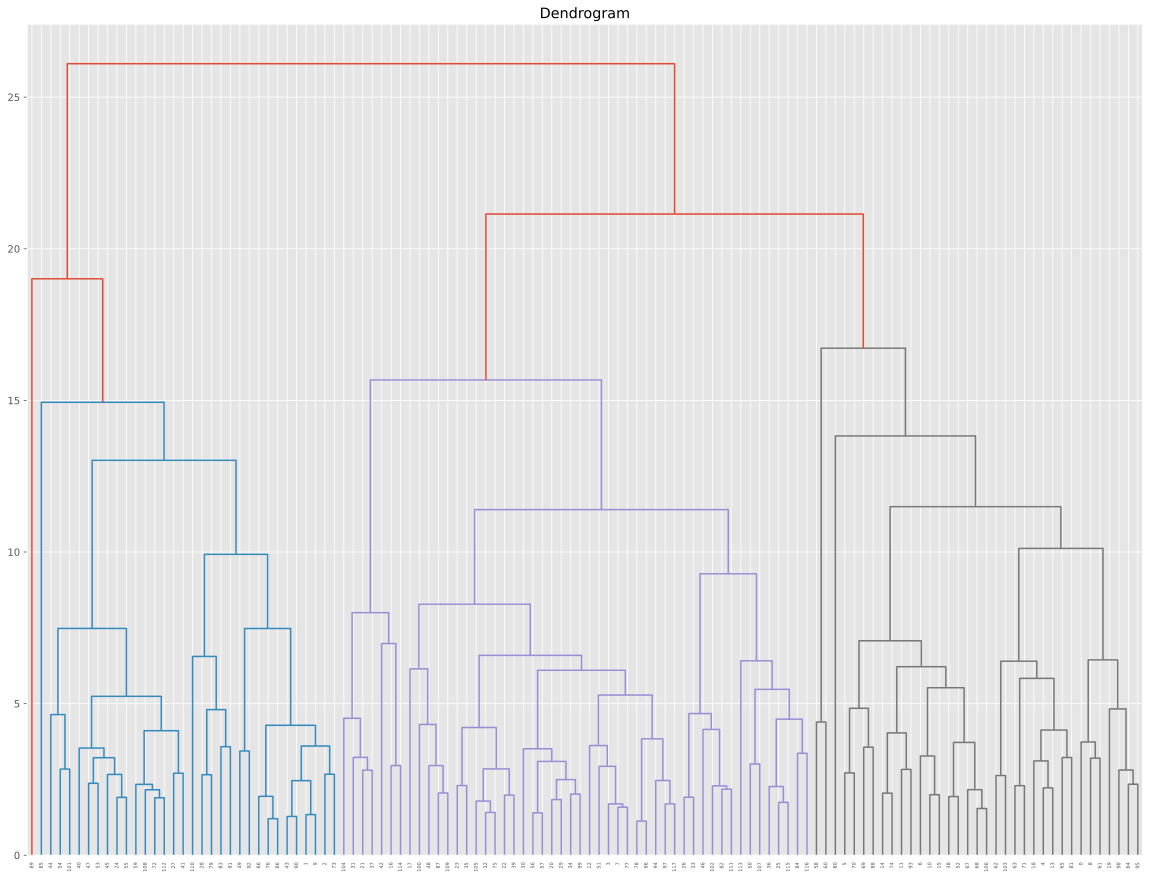

In [125]:
#Create a dendrogram using hierarchical clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 15))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(PCA_components, method='ward'))

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering


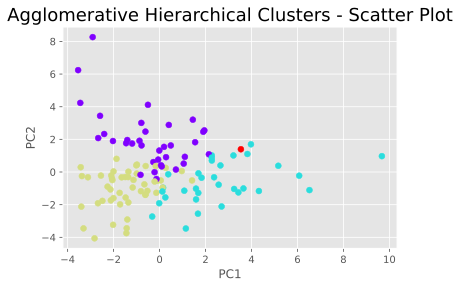

In [128]:
#Plot scatter plot
agc = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 4))
plt.scatter(PCA_components[0],PCA_components[1], c = agc.fit_predict(PCA_components), cmap ='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

Using K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

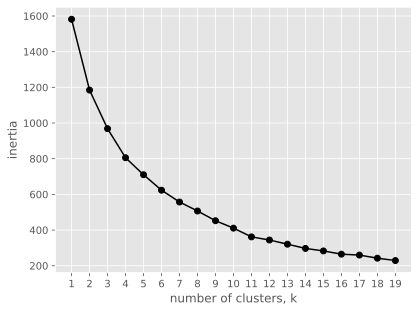

In [129]:
#Elbow method
ks=range(1,20)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:4]) #we only use the first 3 principal components
    inertias.append(model.inertia_)

plt.plot(ks,inertias, '-o',color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show

In [ ]:
!pip install matplotlib scikit-learn

<Figure size 600x400 with 0 Axes>

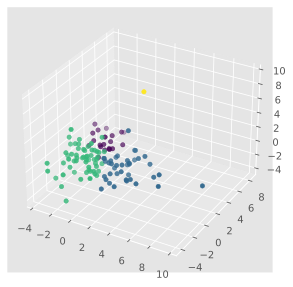

In [132]:
#plot 3-D scatter plot
from matplotlib import pyplot
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Ваш код для создания модели KMeans
# Указываем n_init явно

# Продолжайте работать с вашей моделью...
plt.figure(figsize =(6, 4))
kmeans=KMeans(n_clusters=4, init='k-means++',random_state=42, n_init=10)
kmeans.fit(PCA_components.iloc[:,:9])
labels=kmeans.predict(PCA_components.iloc[:,:9])

fig = pyplot.figure()
ax = fig.add_subplot(projection='3d')
#ax = Axes3D(fig)
ax.scatter(PCA_components[0],PCA_components[1],PCA_components[2],c=labels)
pyplot.show()


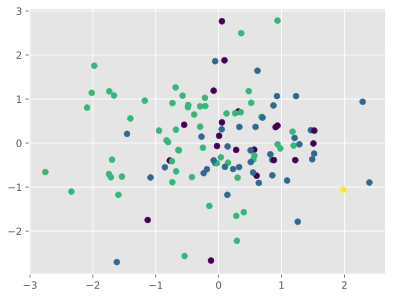

In [134]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans.labels_)
plt.show()

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [136]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

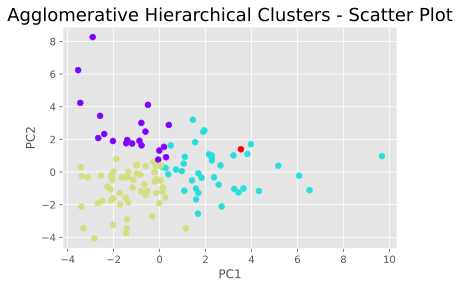

In [144]:
plt.figure(figsize =(6, 4))
plt.scatter(PCA_components[0],PCA_components[1], c = kmeans.fit_predict(PCA_components), cmap ='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters - Scatter Plot", fontsize=18)
plt.show()

In [139]:
def visualisation_2d(cluster):

	k = len(cluster)
	plt.grid()
	plt.xlabel("x")
	plt.ylabel("y")

	for i in range(k):
		x_coordinates = []
		y_coordinates = []
		for q in range(len(cluster[i])):
			x_coordinates.append(cluster[i][q][0])
			y_coordinates.append(cluster[i][q][1])
		plt.scatter(x_coordinates, y_coordinates)
	plt.show()

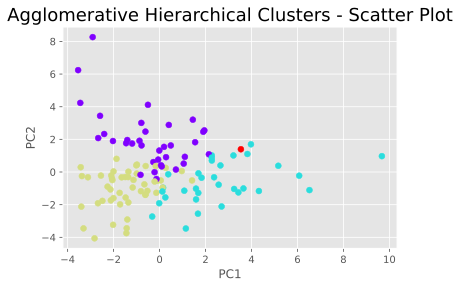

In [140]:
plt.figure(figsize =(6, 4))
plt.scatter(PCA_components[0],PCA_components[1], c = agc.fit_predict(PCA_components), cmap ='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

In [141]:
#Add cluster labels to the original dataset and export to csv file
df['cluster_nbr']=kmeans.labels_
df_clusters=pd.concat([df.reset_index(drop=True),pd.DataFrame(principalComponents)],axis=1)
df_clusters.to_csv('df.csv')

In [ ]:
from google.colab import files

# Сохранение DataFrame в CSV
df_clusters.to_excel('df.xlsx', index=False)

# Скачивание файла
files.download('df.xlsx')
